
Importing the dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

Data Preprocessing

In [9]:
#Load and preprocess dataset
# Dataset link: https://www.cs.toronto.edu/~kriz/cifar.html
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [10]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Build CNN model

In [12]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),  # First pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # Second pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Third convolutional layer
    layers.Flatten(),  # Flattening layer to convert 2D to 1D
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

Compile the model

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [14]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 41ms/step - accuracy: 0.3531 - loss: 1.7447 - val_accuracy: 0.5460 - val_loss: 1.2636
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.5774 - loss: 1.1875 - val_accuracy: 0.6242 - val_loss: 1.0667
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6415 - loss: 1.0205 - val_accuracy: 0.6562 - val_loss: 0.9838
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6753 - loss: 0.9188 - val_accuracy: 0.6688 - val_loss: 0.9437
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 42ms/step - accuracy: 0.7003 - loss: 0.8538 - val_accuracy: 0.6910 - val_loss: 0.8975
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7250 - loss: 0.7804 - val_accuracy: 0.6921 - val_loss: 0.9055
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7492 - loss: 0.7276 - val_accuracy: 0.7066 - val_loss: 0.8726
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7600 -

Plot training history

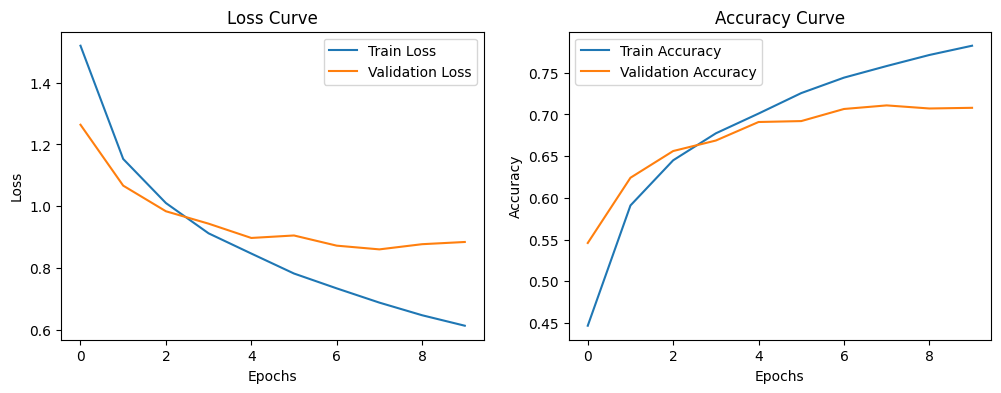

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

Predict and visualize some test samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


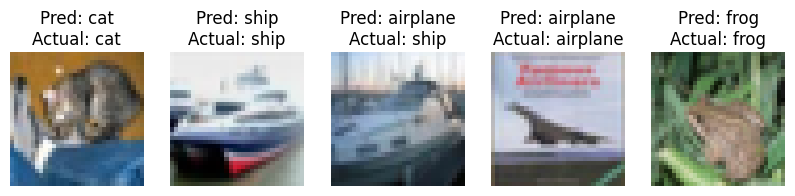

In [17]:
num_samples = 5
sample_images = x_test[:num_samples]
sample_labels = y_test[:num_samples]
predictions = model.predict(sample_images)

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[sample_labels[i][0]]}")
    plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


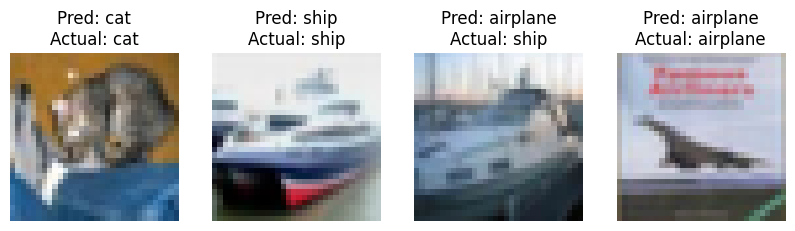

In [19]:
num_samples = 4
sample_images = x_test[:num_samples]
sample_labels = y_test[:num_samples]
predictions = model.predict(sample_images)

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[sample_labels[i][0]]}")
    plt.axis('off')
plt.show()


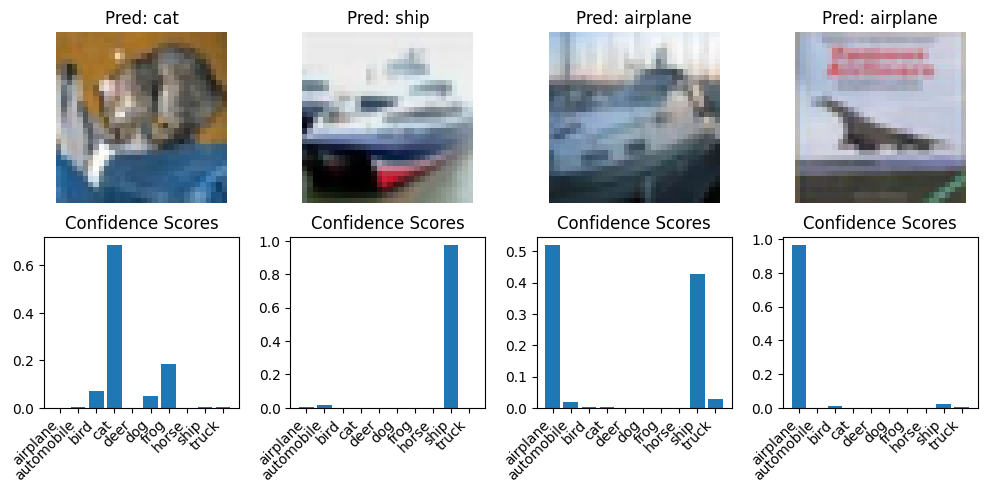

In [20]:
# Display predictions with confidence scores
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(2, num_samples, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')

    plt.subplot(2, num_samples, num_samples + i + 1)
    plt.bar(class_names, predictions[i])
    plt.xticks(rotation=45, ha='right')
    plt.title("Confidence Scores")
plt.tight_layout()
plt.show()

Print actual vs predicted values

In [21]:
for i in range(num_samples):
    print(f"Image {i+1}: Actual: {class_names[sample_labels[i][0]]}, Predicted: {class_names[np.argmax(predictions[i])]}\n")

Image 1: Actual: cat, Predicted: cat

Image 2: Actual: ship, Predicted: ship

Image 3: Actual: ship, Predicted: airplane

Image 4: Actual: airplane, Predicted: airplane

